In [52]:
import utils.feature_extractors as utils
from utils.evaluation import action_evaluator
import numpy as np
import os
import json
from sklearn.pipeline import make_pipeline
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from itertools import product
from sklearn.svm import SVC
import pandas as pd
import optuna
import joblib

In [53]:
config = {
    "train_pos_loc":"data/TR_pos_SPIDER.txt",
    "train_neg_loc":"data/TR_neg_SPIDER.txt",
    "test_pos_loc":"data/TS_pos_SPIDER.txt",
    "test_neg_loc":"data/TS_neg_SPIDER.txt",
    "model_save_loc":"optimized",
    "artifact_dir":"artifacts",
    "random_seed":9
}

In [54]:
sel_model = {
    "AAC":"SVC",
    "DPC":"SVC",
    "CTD":"LGBMClassifier",
    "PAAC":"RandomForest",
    "APAAC":"SVC",
    "RSacid":"SVC",
    "RSpolar":"SVC",
    "RSsecond":"SVC",
    "RScharge":"SVC",
    "RSDHP":"SVC",
    "Combine":"LGBMClassifier",
}

## AAC

In [55]:
feat_type = "AAC"
study = joblib.load(os.path.join(config["model_save_loc"],feat_type,sel_model[feat_type],"study.sav"))
    
with open(os.path.join(config["model_save_loc"],feat_type,sel_model[feat_type],"best_params.json"),"r") as f0:
    params = json.load(f0)
 

optuna.visualization.plot_slice(study)

## CTD

In [56]:
feat_type = "CTD"
study = joblib.load(os.path.join(config["model_save_loc"],feat_type,sel_model[feat_type],"study.sav"))
    
with open(os.path.join(config["model_save_loc"],feat_type,sel_model[feat_type],"best_params.json"),"r") as f0:
    params = json.load(f0)
 

optuna.visualization.plot_slice(study)

In [57]:
optuna.visualization.plot_contour(study, params=['n_estimators', 'max_depth'])

## PAAC

In [58]:
feat_type = "PAAC"
study = joblib.load(os.path.join(config["model_save_loc"],feat_type,sel_model[feat_type],"study.sav"))
    
with open(os.path.join(config["model_save_loc"],feat_type,sel_model[feat_type],"best_params.json"),"r") as f0:
    params = json.load(f0)
 

optuna.visualization.plot_slice(study)

In [59]:
optuna.visualization.plot_contour(study, params=['n_estimators', 'max_depth'])

In [60]:
def get_base_clf_results(config):
    ALL_FEAT = sel_model.keys()
    model_dir = config["model_save_loc"]
    
    metrics = {"model":[],"feature":[]}
    for f in ALL_FEAT:
        if not os.path.exists(os.path.join(model_dir,f,sel_model[f],"metrics.json")):
            continue
        
        with open(os.path.join(model_dir,f,sel_model[f],"metrics.json"),"r") as f0:
            data = json.load(f0)
            
        for k in data.keys():
            try:
                metrics[k].append(data[k])
            except KeyError:
                metrics[k] = [data[k]]
        
        if sel_model[f] == "RandomForest":
            metrics["model"].append("RF")
        else:
            metrics["model"].append(sel_model[f])
        metrics["feature"].append(f)
                    
    metric_df = pd.DataFrame.from_dict(metrics,orient="columns")
    
    return metric_df
    

In [61]:
metrics = get_base_clf_results(config)
metrics = metrics.set_index(["model","feature"])
metrics

accuracy  precision    recall        f1  sensitivity   
model          feature                                                          
SVC            AAC       0.887202   0.893027  0.885520  0.886389     0.825893  \
               DPC       0.861171   0.872326  0.858735  0.859451     0.772321   
LGBMClassifier CTD       0.850325   0.854325  0.848798  0.849407     0.794643   
RF             PAAC      0.867679   0.878498  0.865309  0.866104     0.781250   
SVC            APAAC     0.887202   0.895891  0.885153  0.886117     0.812500   
               RSacid    0.880694   0.886815  0.878946  0.879789     0.816964   
               RSpolar   0.869848   0.876165  0.868030  0.868810     0.803571   
               RSsecond  0.880694   0.884485  0.879314  0.880042     0.830357   
               RScharge  0.885033   0.890397  0.883411  0.884246     0.825893   
               RSDHP     0.872017   0.877134  0.870385  0.871142     0.812500   
LGBMClassifier Combine   0.891540   0.896619  0.889985  0.890837     0.834821   

                         specificity  
model          feature                
SVC            AAC          0.945148  
               DPC          0.945148  
LGBMClassifier CTD          0.902954  
RF             PAAC         0.949367  
SVC            APAAC        0.957806  
               RSacid       0.940928  
               RSpolar      0.932489  
               RSsecond     0.928270  
               RScharge     0.940928  
               RSDHP        0.928270  
LGBMClassifier Combine      0.945148

In [62]:
unoptimized = pd.read_csv("artifacts/base_clf_results.csv")
unoptimized = unoptimized.set_index(["model","feature"])
unoptimized

accuracy  precision    recall        f1   
model                feature                                             
ExtraTreesClassifier AAC       0.882769   0.882968  0.882215  0.882499  \
                     DPC       0.849725   0.849527  0.849956  0.849623   
                     CTD       0.822974   0.822914  0.822394  0.822592   
                     PAAC      0.876475   0.876543  0.876001  0.876217   
                     APAAC     0.872148   0.872049  0.871831  0.871929   
...                                 ...        ...       ...       ...   
KNN                  RSpolar   0.809992   0.810218  0.810628  0.809956   
                     RSsecond  0.807238   0.807237  0.806517  0.806764   
                     RScharge  0.806845   0.807193  0.805840  0.806214   
                     RSDHP     0.810779   0.810543  0.810405  0.810468   
                     Combine   0.810386   0.811349  0.811454  0.810384   

                               sensitivity  specificity  
model                feature                             
ExtraTreesClassifier AAC          0.867539     0.896892  
                     DPC          0.856092     0.843821  
                     CTD          0.807032     0.837756  
                     PAAC         0.863451     0.888552  
                     APAAC        0.863451     0.880212  
...                                    ...          ...  
KNN                  RSpolar      0.827473     0.793783  
                     RSsecond     0.787408     0.825625  
                     RScharge     0.779231     0.832449  
                     RSDHP        0.800491     0.820318  
                     Combine      0.839738     0.783169  

[77 rows x 6 columns]

In [63]:
compare = unoptimized.loc[metrics.index,["f1","accuracy"]]
compare.columns=["tuned_f1","tuned_accuracy"]

compare["unoptimized_f1"] = metrics["f1"]
compare["unoptimized_accuracy"] = metrics["accuracy"]

In [64]:
compare

tuned_f1  tuned_accuracy  unoptimized_f1   
model          feature                                              
SVC            AAC       0.893157        0.893391        0.886389  \
               DPC       0.896670        0.896932        0.859451   
LGBMClassifier CTD       0.861552        0.861920        0.849407   
RF             PAAC      0.878574        0.878836        0.866104   
SVC            APAAC     0.883447        0.883950        0.886117   
               RSacid    0.897017        0.897325        0.879789   
               RSpolar   0.897380        0.897718        0.868810   
               RSsecond  0.897497        0.897718        0.880042   
               RScharge  0.895474        0.895751        0.884246   
               RSDHP     0.895040        0.895358        0.871142   
LGBMClassifier Combine   0.902574        0.902832        0.890837   

                         unoptimized_accuracy  
model          feature                         
SVC            AAC                   0.887202  
               DPC                   0.861171  
LGBMClassifier CTD                   0.850325  
RF             PAAC                  0.867679  
SVC            APAAC                 0.887202  
               RSacid                0.880694  
               RSpolar               0.869848  
               RSsecond              0.880694  
               RScharge              0.885033  
               RSDHP                 0.872017  
LGBMClassifier Combine               0.891540

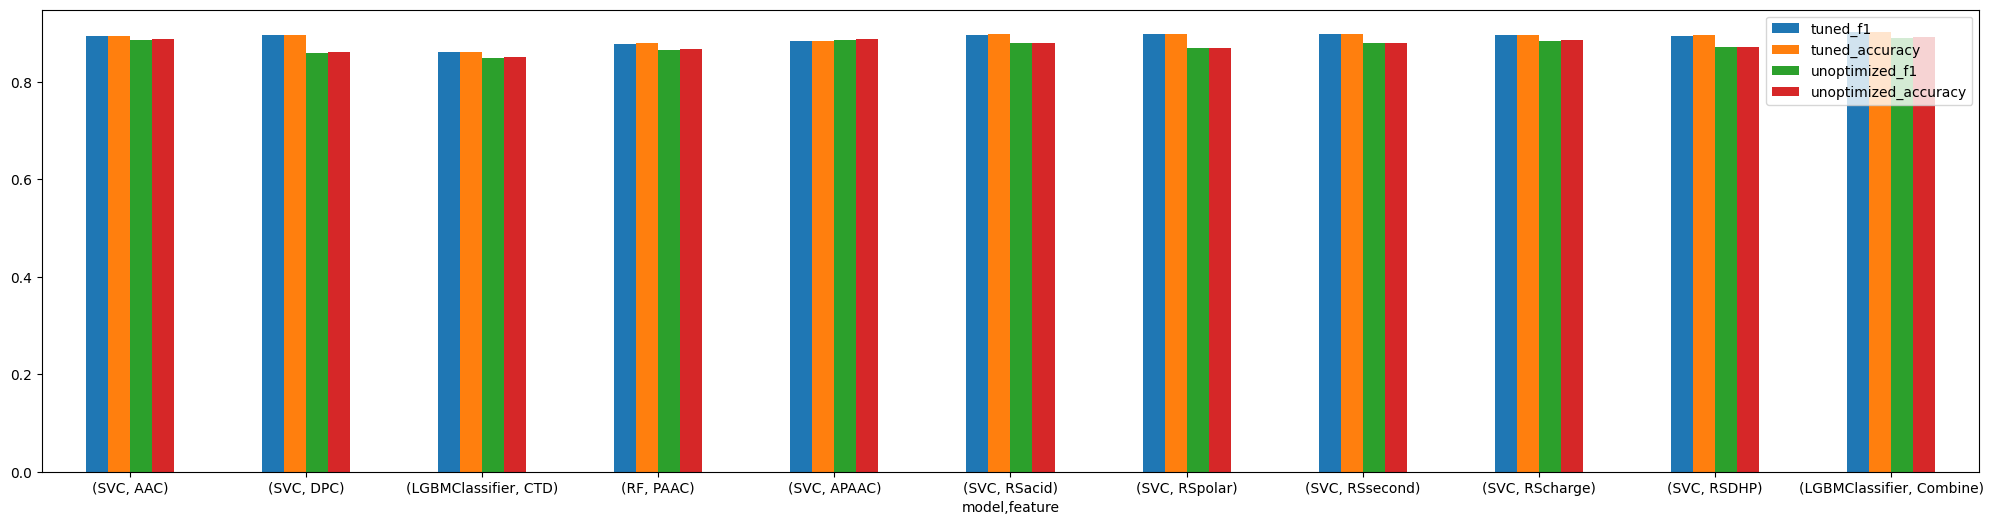

In [65]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,6)
ax = compare.plot(kind="bar", rot=0)